# 데이터 로드

In [1]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.0 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
     |████████████████████████████████| 448 kB 44.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-21 05:26:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=IHQPSxihJmND2t8jeV6gOrb7X%2Fc%3D

In [4]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [7]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(movie&shopping&game).txt')

In [8]:
# 통합 데이터 확인
print(len(total_data))

489016


In [9]:
print(total_data[:3])

                                            document  label
0                                        이유식 냄비로 좋아요      1
1                                       한글화가 없어서짜징난다      0
2  에휴 존나 뚝 뚝 끊키는대뭘게임을하라고 무슨 핑은좋은대 게임만들어가면 뚝뚝 끊키고 ...      0


# 토큰화

In [6]:
# 불용어 파일 로드
import os
data =  open('sentiment_stopwords_v0.3.txt', 'r', encoding='utf-16')
stopwords = []
for line in data :
    line.rstrip()
    stopwords.append(line.replace("\t\n", ""))
print(len(stopwords))
print(stopwords)

114
['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '게임', '영화', '쇼핑', '배송', '이다', '너무', '보다', '되다', '요', '오다', '재다', '구매', '거', '받다', '들다', '주다', '보고', '서', '주문', '나다', '넘다', 'ㅠ', 'ㅠㅠ', 'ㅜㅜ', '걸', '라', '이건', '임', '이나', '내용', '기', '함', '용', '돼다', '에는', '감', '이네', '이랑', '볼', '니', '이고', '해', '라고', 'ㅎ', 'ㅋ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅎㅎㅎㅎ', 'ㅎㅎㅎㅎㅎ', '처럼', '시', '인지', '난', '지다', '줄', '후', '세', '에도', '두다', '님', '크기', '물', '내다', '뭔가', '곳', '작', '력', '허다', '예요', '이라고', '라는', '손', '뿐', '한테', '밖에', '이제', '날', '색', '움', '니까', '인가', '해도', '타', '냐', '장', '원래', '식', '그대로', '이라는', '치다', '되어다', '평점']


In [10]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
mecab = Mecab()
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [11]:
print(len(X_total))
print(X_total[:3])

489016
[['이유식', '냄비', '로', '좋', '아요'], ['한글', '화', '없', '어서', '짜', '징', '난다'], ['에휴', '존나', '뚝', '뚝', '끊', '키는', '대', '뭘', '을', '하', '무슨', '핑', '좋', '대', '만', '들어가', '면', '뚝뚝', '끊', '키', '고', '걸어다니', '면', '괜찮', '은대', '또', '총', '쏘', '면', '뚝뚝', '끊', '키', '고', '해결', '법', '없', '뭘', '을', '하']]


In [12]:
# 토큰화가 오래걸리므로, 반복작업이 용이하도록 파일로 추출해두자
tokened_vocab = X_total
import json
json = json.dumps(tokened_vocab, ensure_ascii=False)
vacab = open("KoNLPy(Mecab)_total_data(movie&shopping&game)_tokened_vocab_v0.6.1.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

# 정수 인코딩

In [13]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [14]:
# indexed_vocab(vocab) 저장
indexed_vocab = tokenizer.word_index
import json
json = json.dumps(indexed_vocab, ensure_ascii=False)
vacab = open("KoNLPy(Mecab)_total_data(movie&shopping&game)_indexed_vocab_v0.6.1.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

In [15]:
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 36
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 89891
등장 빈도가 35번 이하인 희귀 단어의 수: 80072
단어 집합에서 희귀 단어의 비율: 89.076770755693
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.159830121240415


In [20]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9820


In [21]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
y_total = np.array(total_data['label'])

# 빈 샘플(empty samples)제거

In [23]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[2585, 4269, 5097, 11760, 12443, 12498, 14578, 14632, 18067, 27052, 27170, 29080, 33805, 35407, 45510, 51678, 53350, 57959, 58710, 59039, 66046, 69713, 70686, 73202, 76204, 88142, 102136, 108823, 119721, 123766, 127599, 131461, 140306, 142733, 145725, 158591, 163667, 184026, 187242, 190162, 190526, 191729, 191880, 207594, 208545, 215387, 217613, 221465, 222740, 224106, 226612, 236189, 237894, 242963, 256621, 256942, 261718, 273323, 276698, 288124, 291604, 297634, 305761, 310545, 312135, 312615, 314641, 317542, 324397, 332779, 338284, 345519, 379633, 381372, 387693, 390275, 394325, 418726, 427125, 445661, 448246, 454398, 463651, 469084, 471865, 472916]


In [24]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

488930
488930


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 84
리뷰의 평균 길이 : 14.356572515493015


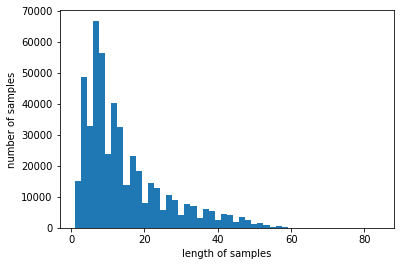

In [25]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [28]:
# 길이별 비율 체크
max_len = 40
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 95.60734665494039


In [29]:
# 짧은 데이터는 0을 채우고, 최적길이를 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

# LSTM/GRU/BiLSTM 모델 훈련

In [30]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model_LSTM = Sequential()
model_LSTM.add(Embedding(vocab_size+2, 100))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(1, activation='sigmoid'))

In [32]:
model_GRU = Sequential()
model_GRU.add(Embedding(vocab_size+2, 100))
model_GRU.add(GRU(128))
model_GRU.add(Dense(1, activation='sigmoid'))

In [33]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(vocab_size+2, 100))
model_BiLSTM.add(Bidirectional(LSTM(128)))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

In [34]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc_LSTM = ModelCheckpoint('RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_GRU = ModelCheckpoint('RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_BiLSTM = ModelCheckpoint('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [35]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [36]:
# LSTM모델 훈련
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_LSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_LSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3912/3912 [==============================] - 71s 17ms/step - loss: 0.3618 - acc: 0.8405 - auc: 0.9190 - auc_1: 0.9172 - recall: 0.8292 - precision: 0.8480 - true_positives: 162010.0000 - true_negatives: 166740.0000 - false_positives: 29032.0000 - false_negatives: 33362.0000 - val_loss: 0.3323 - val_acc: 0.8555 - val_auc: 0.9334 - val_auc_1: 0.9325 - val_recall: 0.8192 - val_precision: 0.8837 - val_true_positives: 40102.0000 - val_true_negatives: 43556.0000 - val_false_positives: 5280.0000 - val_false_negatives: 8848.0000

Epoch 00001: val_acc improved from -inf to 0.85552, saving model to RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5
Epoch 2/15
3912/3912 [==============================] - 63s 16ms/step - loss: 0.3152 - acc: 0.8652 - auc: 0.9390 - auc_1: 0.9374 - recall: 0.8563 - precision: 0.8715 - true_positives: 167294.0000 - true_negatives: 171105.0000 - false_positives: 24667.0000 - false_negatives: 28078.0000 - val_loss: 0.3207 - val_acc: 0.8647 - val_auc:

In [37]:
# GRU모델 훈련
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_GRU.fit(X_total, y_total, epochs=15, callbacks=[es, mc_GRU], batch_size=100, validation_split=0.2)

Epoch 1/15
3912/3912 [==============================] - 65s 16ms/step - loss: 0.3639 - acc: 0.8396 - auc: 0.9227 - auc_1: 0.9206 - recall: 0.8359 - precision: 0.8523 - true_positives: 204230.0000 - true_negatives: 209222.0000 - false_positives: 35386.0000 - false_negatives: 40092.0000 - val_loss: 0.3361 - val_acc: 0.8541 - val_auc: 0.9317 - val_auc_1: 0.9298 - val_recall: 0.8180 - val_precision: 0.8820 - val_true_positives: 40043.0000 - val_true_negatives: 43477.0000 - val_false_positives: 5359.0000 - val_false_negatives: 8907.0000

Epoch 00001: val_acc improved from -inf to 0.85411, saving model to RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5
Epoch 2/15
3912/3912 [==============================] - 61s 16ms/step - loss: 0.3150 - acc: 0.8655 - auc: 0.9390 - auc_1: 0.9371 - recall: 0.8572 - precision: 0.8714 - true_positives: 167467.0000 - true_negatives: 171067.0000 - false_positives: 24705.0000 - false_negatives: 27905.0000 - val_loss: 0.3200 - val_acc: 0.8632 - val_auc: 

In [38]:
# BiLSTM모델 훈련
model_BiLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_BiLSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_BiLSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3912/3912 [==============================] - 85s 21ms/step - loss: 0.3642 - acc: 0.8389 - auc: 0.9223 - auc_1: 0.9206 - recall: 0.8369 - precision: 0.8496 - true_positives: 204470.0000 - true_negatives: 208401.0000 - false_positives: 36207.0000 - false_negatives: 39852.0000 - val_loss: 0.3353 - val_acc: 0.8546 - val_auc: 0.9324 - val_auc_1: 0.9306 - val_recall: 0.8704 - val_precision: 0.8440 - val_true_positives: 42605.0000 - val_true_negatives: 40962.0000 - val_false_positives: 7874.0000 - val_false_negatives: 6345.0000

Epoch 00001: val_acc improved from -inf to 0.85459, saving model to RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5
Epoch 2/15
3912/3912 [==============================] - 79s 20ms/step - loss: 0.3163 - acc: 0.8649 - auc: 0.9386 - auc_1: 0.9367 - recall: 0.8561 - precision: 0.8711 - true_positives: 167261.0000 - true_negatives: 171021.0000 - false_positives: 24751.0000 - false_negatives: 28111.0000 - val_loss: 0.3160 - val_acc: 0.8644 - val_au

# LSTM/GRU/BiLSTM 모델 성능평가

In [39]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [40]:
# LSTM모델 성능 평가 
loaded_model = load_model('RNN_LSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n LSTM 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0706 - acc: 0.5000 - auc: 0.5263 - auc_1: 0.7166 - recall: 0.4767 - precision: 0.7158 - true_positives: 3554.0000 - true_negatives: 1760.0000 - false_positives: 1411.0000 - false_negatives: 3902.0000

 LSTM 테스트 결과: [1.0706158876419067, 0.5000470280647278, 0.5262803435325623, 0.7166396379470825, 0.47666308283805847, 0.7158106565475464, 3554.0, 1760.0, 1411.0, 3902.0]


In [41]:
# GRU모델 성능 평가 
loaded_model = load_model('RNN_GRU_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0779 - acc: 0.4887 - auc: 0.5263 - auc_1: 0.7185 - recall: 0.4474 - precision: 0.7174 - true_positives: 3336.0000 - true_negatives: 1857.0000 - false_positives: 1314.0000 - false_negatives: 4120.0000

 GRU 테스트 결과: [1.0779041051864624, 0.4886609613895416, 0.526314914226532, 0.7185148000717163, 0.44742488861083984, 0.7174193263053894, 3336.0, 1857.0, 1314.0, 4120.0]


In [42]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.6.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM 테스트 결과:",result)

107/107 [==============================] - 2s 9ms/step - loss: 1.0725 - acc: 0.4553 - auc: 0.5224 - auc_1: 0.7213 - recall: 0.3785 - precision: 0.7098 - true_positives: 2822.0000 - true_negatives: 2017.0000 - false_positives: 1154.0000 - false_negatives: 4634.0000

 BiLSTM 테스트 결과: [1.0724799633026123, 0.4553495943546295, 0.5224245190620422, 0.7212986946105957, 0.37848711013793945, 0.7097585797309875, 2822.0, 2017.0, 1154.0, 4634.0]
